# Prediting the Heart Disease using machine learning

We are going to take the following approach.
* Problem Definition.
* Data.
* Evaluation.
* Features.
* Modeling. 
* Experiments.
 
## Problem Definition
In a statement ,Given clinical parameters about a patient can we predict whether or not they having heart disease

## Data
The data came from the Kaggle Respository https://www.kaggle.com/ronitf/heart-disease-uci

## Evalution 
If we can predict the perfect accuracy at preditiong whether or not a patient has heart disease or not during the proof of concept ,we'll purser the project.

## Features
This is where you'll get different information about each of the feature in data.
* age
* sex: (Female=0 , Male=1)
* cp: chest pain type (4 values)
* trestbps: resting blood pressure
* chol: serum cholestoral in mg/dl
* fbs: fasting blood sugar > 120 mg/dl
* restecg: resting electrocardiographic results (values 0,1,2)
* thalach: maximum heart rate achieved
* exang: exercise induced angina
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect.
* target: have disease or not (1=yes, 0=no)

# Modeling 
Import the analysis libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
#let see the counts of the patients how much is suffering form the heart disease 1= having heart disease 0= not having heart disease
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [5]:
# let see who suffer more for heart disease Male=1 or Female=0.
pd.crosstab(data.target,data.sex)

sex,0,1
target,,
0,24,114
1,72,93


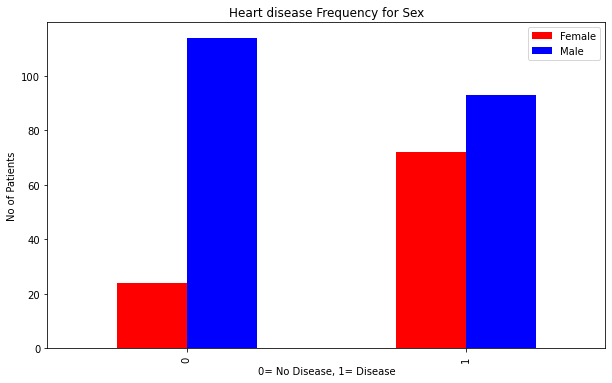

In [6]:
# visluation to understanding in more proper manner.
pd.crosstab(data.target,data.sex).plot(kind='bar',
                                      figsize=(10,6),
                                      color=('red','blue'));
plt.title("Heart disease Frequency for Sex")
plt.xlabel("0= No Disease, 1= Disease")
plt.ylabel("No of Patients")
plt.legend(["Female","Male"]);

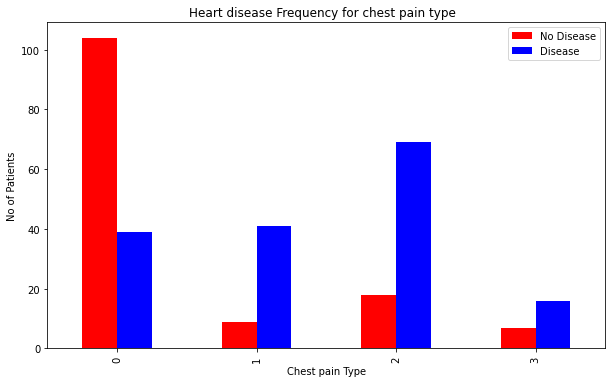

In [7]:
pd.crosstab(data.cp,data.target).plot(kind='bar',
                                      figsize=(10,6),
                                      color=('red','blue'));
plt.title("Heart disease Frequency for chest pain type  ") 
plt.xlabel("Chest pain Type")
plt.ylabel("No of Patients")
plt.legend(["No Disease", "Disease"]);

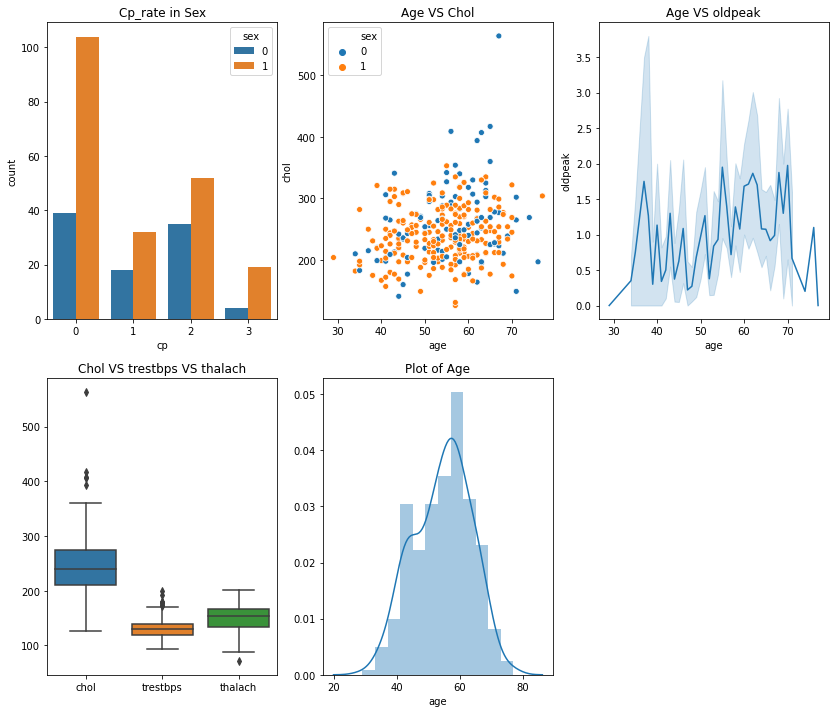

In [40]:
fig = plt.figure(figsize=(14,12))

#  subplot #1
plt.subplot(231)
plt.title('Cp_rate in Sex')
sns.countplot(data = data, x='cp',hue='sex')

#  subplot #2
plt.subplot(2,3,2)
plt.title('Age VS Chol')
sns.scatterplot(data = data,x='age',y='chol',hue='sex')

#  subplot #3
plt.subplot(233)
plt.title('Age VS oldpeak')
sns.lineplot(data = data, x=data['age'],y=data['oldpeak'])

#  subplot #4
plt.subplot(2,3,4)
plt.title('Chol VS trestbps VS thalach')
sns.boxplot(data = data[['chol','trestbps','thalach']])

#  subplot #5
plt.subplot(235)
plt.title('Plot of Age')
sns.distplot(data.age)

plt.show()


In [9]:
#let see is there any close relation between indepent features
corr=data.corr()

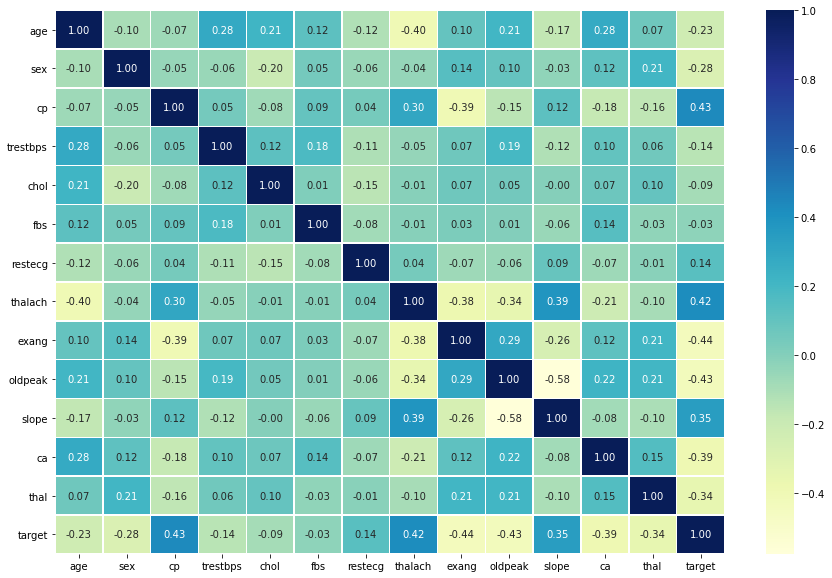

In [10]:
# Make in understand ways by creating heatmap
fig,ax=plt.subplots(figsize=(15,10))

ax = sns.heatmap(corr,
               annot=True,
               linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu")

In [11]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


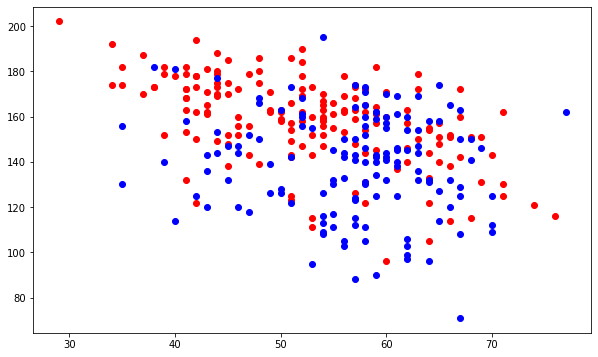

In [13]:
#Creating the plot between thalach and sex 
plt.figure(figsize = (10,6))

#Scatter the positive plot
plt.scatter(data.age[data.target==1],
           data.thalach[data.target==1],
           c='red');
#Scatter the positive plot
plt.scatter(data.age[data.target==0],
           data.thalach[data.target==0],
           c='blue');

# Data Preprocessing
Heart data is clean so, we don't need to find any missing values(NaN) or convert any categorical variable into number



In [14]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=0)


In [16]:
from sklearn.preprocessing import StandardScaler
str_x=StandardScaler()
x_train=str_x.fit_transform(x_train)
x_test=str_x.fit_transform(x_test)

In [17]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier()  
classifier.fit(x_train, y_train)  

RandomForestClassifier()

In [18]:
#predicting
y_pred=classifier.predict(x_test) 

In [19]:
# Checking the score of the Training set done by the model.
classifier.score(x_train,y_train)

1.0

In [20]:
#Checking the score of the Testing set done by the model.
classifier.score(x_test,y_test)

0.8215962441314554

In [21]:
#We are getting score of 82/100 to make the more accuary(evoluated) score, we import some parameters
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80        96
           1       0.82      0.86      0.84       117

    accuracy                           0.82       213
   macro avg       0.82      0.82      0.82       213
weighted avg       0.82      0.82      0.82       213



In [22]:
# we are make the confusion_matrix 
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 74,  22],
       [ 16, 101]], dtype=int64)

In [23]:
# checking the accuarcy_score of the test data 
accuracy_score(y_test,y_pred)

0.8215962441314554

In [24]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : np.arange(2,20,1),
    'min_samples_leaf' : np.arange(1,10,1),
    'min_samples_split': np.arange(2,10,1),
}
    

In [25]:
from sklearn.model_selection import RandomizedSearchCV 
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=grid_param,
                        cv=5,
                        n_iter=20,
                        verbose=True)

In [26]:
#let's see the best parameters as per our grid search
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   19.6s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': [90, 100, 115, 130]},
                   verbose=True)

In [27]:
rs_rf.best_params_

{'n_estimators': 130,
 'min_samples_split': 8,
 'min_samples_leaf': 7,
 'max_depth': 16,
 'criterion': 'gini'}

In [28]:
classifier= RandomForestClassifier(n_estimators= 100,
                                    min_samples_split= 7,
                                    min_samples_leaf= 1,
                                    max_depth= 10,
                                    criterion= 'entropy')  
classifier.fit(x_train, y_train) 

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=7)

In [29]:
# accuracy of our classification tree
classifier.score(x_test,y_test)

0.8403755868544601

In [30]:
classifier.score(x_train,y_train)

0.9777777777777777

## Logistic Regression


In [31]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
reg= LogisticRegression(random_state=0)  
reg.fit(x_train, y_train)  

LogisticRegression(random_state=0)

In [32]:
reg.score(x_train,y_train)

0.9111111111111111

In [33]:
reg.score(x_test,y_test)

0.8215962441314554

In [34]:
cm

array([[ 74,  22],
       [ 16, 101]], dtype=int64)

In [35]:
true_positive = cm[0][0]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_negative = cm[1][1]

In [36]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8215962441314554

In [37]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.7708333333333334

In [38]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8222222222222222